# Various Hypothesis

## Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
basics = pd.read_csv('Data/final_basics.csv.gz',low_memory = False)
akas = pd.read_csv('Data/final_akas.csv.gz',low_memory = False)
ratings = pd.read_csv('Data/final_ratings.csv.gz', low_memory = False)
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)

# Question 1
 - Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [3]:
tmdb_df = pd.concat([year_2000, year_2001])
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2545 entries, 0 to 1315
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2545 non-null   object 
 1   adult                  2543 non-null   float64
 2   backdrop_path          1373 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2543 non-null   float64
 5   genres                 2543 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2543 non-null   float64
 8   original_language      2543 non-null   object 
 9   original_title         2543 non-null   object 
 10  overview               2492 non-null   object 
 11  popularity             2543 non-null   float64
 12  poster_path            2285 non-null   object 
 13  production_companies   2543 non-null   object 
 14  production_countries   2543 non-null   object 
 15  rele

In [4]:
df = tmdb_df.dropna(subset=['certification','revenue'])
df = df.set_index('imdb_id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, tt0118694 to tt8795764
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  809 non-null    float64
 1   backdrop_path          618 non-null    object 
 2   belongs_to_collection  108 non-null    object 
 3   budget                 809 non-null    float64
 4   genres                 809 non-null    object 
 5   homepage               91 non-null     object 
 6   id                     809 non-null    float64
 7   original_language      809 non-null    object 
 8   original_title         809 non-null    object 
 9   overview               809 non-null    object 
 10  popularity             809 non-null    float64
 11  poster_path            780 non-null    object 
 12  production_companies   809 non-null    object 
 13  production_countries   809 non-null    object 
 14  release_date           809 non-null    object 
 1

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2172.0,PG
tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.80,49.0,R
tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,Upon discovery of a shard of what could be the...,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.07,178.0,R
tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,Study hard.,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.00,0.0,R
tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.50,44.0,R


## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the rating of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the rating of a movie.  

## Determine the Correct Test to Perform
- Numerical Data
- More than 2
- ANOVA Test

In [5]:
df['certification'].value_counts()

R          459
PG-13      183
NR          73
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [6]:
df = df[df.revenue !=0]

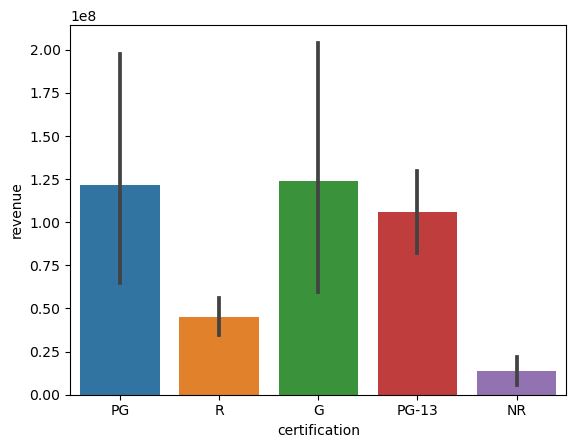

In [7]:
ax = sns.barplot(data=df, x='certification', y='revenue')

In [8]:
needed_cols = ['certification', 'revenue']
df[needed_cols]

,certification,revenue
imdb_id,,
tt0118694,PG,12854953.0
tt0120467,R,14904.0
tt0120630,G,224834564.0
tt0120753,R,105983.0
tt0120755,PG-13,546388105.0
...,...,...
tt0286751,R,318451.0
tt0287635,PG,28023563.0
tt0290332,PG,10229331.0


In [9]:
groups = {}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR'])

## Testing Assumptions
- No Significant Outliers
- Normality
- Equal Variance

### Checking Assumption of No Significant Outliers

In [10]:
for certification, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'There were {outliers.sum()} outliers in the {certification} group.')
    data = data.loc[~outliers]
    groups[certification] = data

There were 1 outliers in the PG group.
There were 5 outliers in the R group.
There were 1 outliers in the G group.
There were 2 outliers in the PG-13 group.
There were 0 outliers in the NR group.


### Checking Normality

In [11]:
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\james\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\james\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,PG,31,4.044377e-05,True
1,R,163,1.802441e-14,True
2,G,13,3.648793e-01,False
3,PG-13,121,1.327067e-09,True
4,NR,12,2.440801e-01,False


- PG, R, PG-13 all have normal distribution
- G and NR fail to meet normality

### Test for Equal Variances

In [12]:
result = stats.levene(*groups.values())
result

LeveneResult(statistic=8.47344846108848, pvalue=1.5980984465059451e-06)

In [13]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We have failed to meet the assumption of normality and failed to meet the assumption of equal variance.
We wanted to run an ANOVA test but will run a Kurskal-Wallis test.

## Final Hypothesis - Kurskal-Wallis

In [14]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<0.05

KruskalResult(statistic=48.11536460789059, pvalue=8.929398945692642e-10)


True

- Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that there is a significant difference between revenue and the movie certifications. 

# Question 2
- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)? 

## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the runtime of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the runtime of a movie. 

## Determine the Correct Test to Perform
- Numeric Data
- Two groups/samples
- We want to run a 2-Sample T-Test

In [15]:
df['runtime'].value_counts()

106.0    13
95.0     13
90.0     12
99.0     11
104.0    10
         ..
74.0      1
199.0     1
165.0     1
141.0     1
172.0     1
Name: runtime, Length: 75, dtype: int64

In [28]:
time_range = (df['runtime']<=150)&(df['runtime']<90)

In [29]:
df = df.loc[time_range,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  0 non-null      float64
 1   backdrop_path          0 non-null      object 
 2   belongs_to_collection  0 non-null      object 
 3   budget                 0 non-null      float64
 4   genres                 0 non-null      object 
 5   homepage               0 non-null      object 
 6   id                     0 non-null      float64
 7   original_language      0 non-null      object 
 8   original_title         0 non-null      object 
 9   overview               0 non-null      object 
 10  popularity             0 non-null      float64
 11  poster_path            0 non-null      object 
 12  production_companies   0 non-null      object 
 13  production_countries   0 non-null      object 
 14  release_date           0 non-null      object 
 15  revenue                

In [30]:
needed_cols = ['runtime', 'revenue']
df[needed_cols]

,runtime,revenue
imdb_id,,


In [27]:
hour_half = df.loc[df['runtime']<90, needed_cols]
hour_half

,runtime,revenue
imdb_id,,


## Testing Assumptions

### Checking Assumption of No Significant Outliers

### Checking Normality

### Test for Equal Variances

## Final Hypothesis - 

# Question 3
- Do some movie genres earn more revenue than others?

## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the rating of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the rating of a movie. 

## Determine the Correct Test to Perform

## Testing Assumptions

### Checking Assumption of No Significant Outliers

### Checking Normality

### Test for Equal Variances

## Final Hypothesis - 